## Needy Paws Adoption Data Model

In [125]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
%matplotlib inline

dogs = pd.read_excel('/Users/bbjang/Documents/LaunchCodeProjects/dog-rescue-prediction/NeedyPawsMaster.xlsx', sep=",")

dogs_filtered = dogs.copy()

dogs.head()

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,Aaron,30,N,Labrador,M,Young,Yellow,Medium
1,Abby,11,N,Dachshund,F,Adult,Tan,Small
2,Abby,31,N,Unknown,F,Adult,Brindle,Medium
3,Abby,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
4,Abby,83,N,Chihuahua,F,Adult,Tan,Small


In [126]:
dogs.shape

(3088, 8)

In [127]:
dogs_filtered.head()

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,Aaron,30,N,Labrador,M,Young,Yellow,Medium
1,Abby,11,N,Dachshund,F,Adult,Tan,Small
2,Abby,31,N,Unknown,F,Adult,Brindle,Medium
3,Abby,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
4,Abby,83,N,Chihuahua,F,Adult,Tan,Small


In [128]:
dogs_filtered.shape

(3088, 8)

In [129]:
dogs_filtered.dropna(inplace=True)

In [130]:
dogs_filtered.shape

(3014, 8)

In [131]:
dogs_filtered.drop(columns=['Name of Dog'], inplace = True)

In [132]:
dogs_filtered.shape

(3014, 7)

In [134]:
dogs_filtered.drop(index = dogs_filtered[dogs_filtered['Days in Rescue'] == 'Unknown'].index, inplace = True)


In [135]:
dogs_filtered.shape

(3014, 7)

In [136]:
dogs_filtered.drop(index = dogs_filtered[dogs_filtered['Heartworm Positive'] == 'Unknown'].index, inplace = True)


In [137]:
dogs_filtered.shape

(3014, 7)

In [138]:
dogs_filtered.drop(index = dogs_filtered[dogs_filtered['Breed'] == 'Unknown'].index, inplace = True)


In [139]:
dogs_filtered.shape

(3008, 7)

In [140]:
dogs_filtered.drop(index = dogs_filtered[dogs_filtered['Sex'] == 'Unknown'].index, inplace = True)


In [141]:
dogs_filtered.shape

(3008, 7)

In [142]:
dogs_filtered.drop(index = dogs_filtered[dogs_filtered['Age Group When Rescued'] == 'Unknown'].index, inplace = True)


In [143]:
dogs_filtered.shape

(3007, 7)

In [144]:
dogs_filtered.drop(index = dogs_filtered[dogs_filtered['Color'] == 'Unknown'].index, inplace = True)


In [145]:
dogs_filtered.shape

(3007, 7)

In [146]:
dogs_filtered.drop(index = dogs_filtered[dogs_filtered['Size'] == 'Unknown'].index, inplace = True)


In [147]:
dogs_filtered.shape

(3007, 7)

In [148]:
dogs_filtered.head()

,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,30,N,Labrador,M,Young,Yellow,Medium
1,11,N,Dachshund,F,Adult,Tan,Small
3,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
4,83,N,Chihuahua,F,Adult,Tan,Small
5,90,N,Mastiff,F,Young,Red,Large


In [149]:
dogs['Breed'].unique()

array(['Labrador', 'Dachshund', 'Unknown', 'Mixed Breed (Non-Pitbull)',
       'Chihuahua', 'Mastiff', 'Shepherd', 'Golden Retriever ',
       'Border Collie', 'Pointer', 'Pitbull', 'Mixed Breed (Pitbull)',
       'Schnauzer', 'Great Pyranees', 'Aussie', 'Beagle',
       'Cocker Spaniel', 'Jack Russell Terrier', 'Terrier', 'Shih Tzu',
       'Hound', 'Rottweiler', 'Corgi', 'Yorkie',
       'MIxed Breed (Non-Pitbull)', 'German Shepherd', 'Golden Retriever',
       'Husky', 'Black Mouth Cur', 'Japanese Chin', 'Shar Pei',
       'Plott Hound', 'Sheltie', 'Pug ', 'Poodle', 'Shiba Inu',
       'Miniature Pinscher', 'Bichon Frise', 'Rat Terrier', 'Pomeranian',
       'Maltese', 'Pug', 'Catahoula', 'Basset Hound', 'Brittany Spaniel',
       'Boxer  ', 'Chow Chow', 'Westie', 'Boxer', 'Doberman',
       'Italian GreyHound', 'Cane Corso', 'Papillion', 'Weimaraner',
       'Scottish Terrier', 'Cairn Terrier', 'Boston Terrier', 'Spaniel',
       'Coonhound', 'Australian Cattle Dog', 'Bulldog',
   

In [150]:
dogs['Breed'].unique().size

103

In [151]:
dogs_filtered['Breed'] = dogs_filtered['Breed'].apply(lambda x: x.lower())

In [152]:
dogs_filtered['Breed'].unique()

array(['labrador', 'dachshund', 'mixed breed (non-pitbull)', 'chihuahua',
       'mastiff', 'shepherd', 'golden retriever ', 'border collie',
       'pointer', 'pitbull', 'mixed breed (pitbull)', 'schnauzer',
       'great pyranees', 'aussie', 'beagle', 'cocker spaniel',
       'jack russell terrier', 'terrier', 'shih tzu', 'hound',
       'rottweiler', 'corgi', 'yorkie', 'german shepherd',
       'golden retriever', 'husky', 'black mouth cur', 'japanese chin',
       'shar pei', 'plott hound', 'sheltie', 'pug ', 'poodle',
       'shiba inu', 'miniature pinscher', 'bichon frise', 'rat terrier',
       'pomeranian', 'maltese', 'pug', 'catahoula', 'basset hound',
       'brittany spaniel', 'boxer  ', 'chow chow', 'westie', 'boxer',
       'doberman', 'italian greyhound', 'cane corso', 'papillion',
       'weimaraner', 'scottish terrier', 'cairn terrier',
       'boston terrier', 'spaniel', 'coonhound', 'australian cattle dog',
       'bulldog', 'american staffordshire terrier', 'beagle '

In [153]:
dogs_filtered['Breed'].unique().size

98

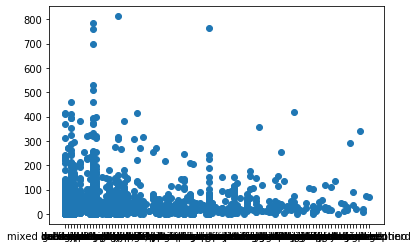

In [154]:
plt.scatter(dogs_filtered['Breed'], dogs_filtered['Days in Rescue'])

In [155]:
dogs['Heartworm Positive'].unique()

array(['N', 'Y', 'y'], dtype=object)

In [156]:
dogs_filtered['Heartworm Positive'] = dogs_filtered['Heartworm Positive'].apply(lambda x: x.upper())

In [157]:
dogs_filtered['Heartworm Positive'].unique()

array(['N', 'Y'], dtype=object)

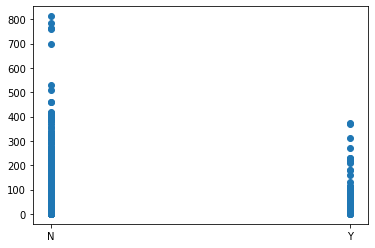

In [158]:
plt.scatter(dogs_filtered['Heartworm Positive'], dogs_filtered['Days in Rescue'])

In [159]:
dogs_filtered['Sex'].unique()

array(['M', 'F'], dtype=object)

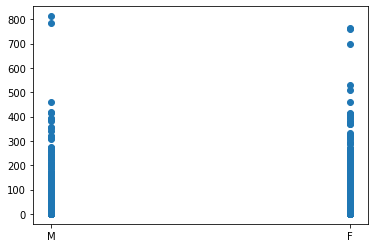

In [160]:
plt.scatter(dogs_filtered['Sex'], dogs_filtered['Days in Rescue'])

In [161]:
dogs_filtered['Age Group When Rescued'].unique()

array(['Young', 'Adult', 'Puppy', 'Senior'], dtype=object)

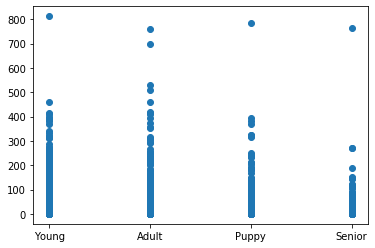

In [162]:
plt.scatter(dogs_filtered['Age Group When Rescued'], dogs_filtered['Days in Rescue'])

In [163]:
dogs_filtered['Color'].unique()

array(['Yellow', 'Tan', 'Multicolor', 'Red', 'Brindle', 'White', 'Black',
       'Brown', 'Blue', 'Gray', 'Merle'], dtype=object)

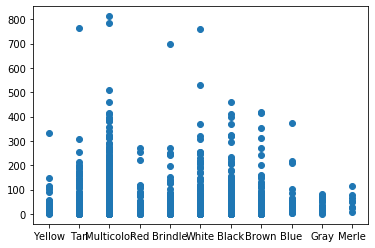

In [164]:
plt.scatter(dogs_filtered['Color'], dogs_filtered['Days in Rescue'])

In [165]:
dogs_filtered['Size'].unique()

array(['Medium', 'Small', 'Large', 'X Large'], dtype=object)

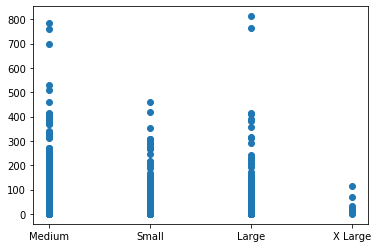

In [166]:
plt.scatter(dogs_filtered['Size'], dogs_filtered['Days in Rescue'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a498e0a10>]],
      dtype=object)

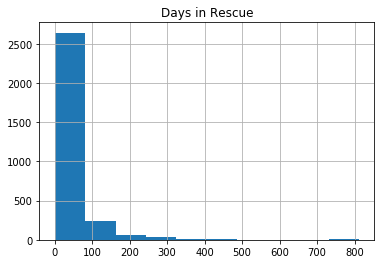

In [167]:
dogs_filtered.hist()

In [168]:
dogs_filtered = dogs_filtered[dogs_filtered['Days in Rescue'] <= 350]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a498fad10>]],
      dtype=object)

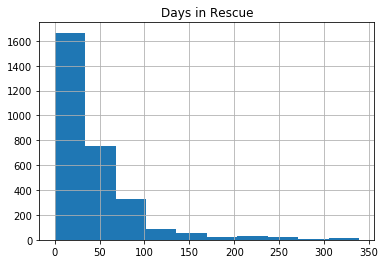

In [169]:
dogs_filtered.hist()

In [170]:
dogs_filtered.shape

(2981, 7)

In [171]:
X = dogs_filtered[['Breed', 'Sex', 'Age Group When Rescued', 'Color', 'Size', 'Heartworm Positive']]

In [172]:
Y = dogs_filtered['Days in Rescue']

In [173]:
#Convert categorical variable into dummy/indicator variables 
#and drop one in each category
X = pd.get_dummies(data=X, drop_first=True)

In [174]:
X.head()

,Breed_american bulldog,Breed_american staffordshire terrier,Breed_anatolian shepherd,Breed_aussie,Breed_australian cattle dog,Breed_basenji,Breed_basset hound,Breed_beagle,Breed_beagle,Breed_beagle,...,Color_Merle,Color_Multicolor,Color_Red,Color_Tan,Color_White,Color_Yellow,Size_Medium,Size_Small,Size_X Large,Heartworm Positive_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [175]:
# Shuffle the examples
X = X.reindex(np.random.permutation(X.index))

In [176]:
#Split training and test sets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2384, 115) (2384,)
(597, 115) (597,)


In [177]:
#Fit model on training data
model = linear_model.LinearRegression()

model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
y_predictions = model.predict(X_test)

In [179]:
#Print model accuracy score
print(model.score(X_test, Y_test))

-8.60442780388269e+21


Text(0, 0.5, 'Predictions')

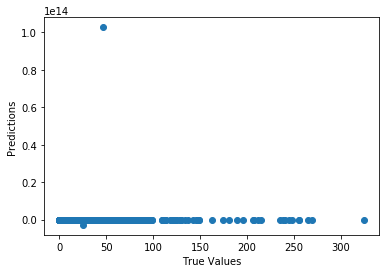

In [180]:
plt.scatter(Y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [181]:
from sklearn.metrics import mean_squared_error

regression_model_mse = mean_squared_error(y_predictions, Y_test)
regression_model_mse

1.7698409113320397e+25

In [192]:
import math

rmse = math.sqrt(regression_model_mse)
rmse

4206947719347.175

In [66]:
# Using TensorFlow-Keras API

In [183]:
import tensorflow as tf
from tensorflow.keras import layers


In [184]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(115,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError(), 'accuracy'])

  return model               


def train_model(model, X, Y, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=X,
                      y=Y,
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

#   # Gather the model's trained weight and bias.
#   trained_weight = model.get_weights()[0]
#   trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [185]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


(2981, 115)
Train on 2086 samples, validate on 895 samples
Epoch 1/30
2086/2086 [==============================] - 1s 267us/sample - loss: 3357.6955 - root_mean_squared_error: 57.9456 - accuracy: 0.0014 - val_loss: 3608.3389 - val_root_mean_squared_error: 60.0694 - val_accuracy: 0.0045
Epoch 2/30
2086/2086 [==============================] - 0s 21us/sample - loss: 2792.3705 - root_mean_squared_error: 52.8429 - accuracy: 0.0014 - val_loss: 3122.1818 - val_root_mean_squared_error: 55.8765 - val_accuracy: 0.0045
Epoch 3/30
2086/2086 [==============================] - 0s 26us/sample - loss: 2445.3050 - root_mean_squared_error: 49.4500 - accuracy: 0.0014 - val_loss: 2789.0728 - val_root_mean_squared_error: 52.8117 - val_accuracy: 0.0045
Epoch 4/30
2086/2086 [==============================] - 0s 26us/sample - loss: 2240.6669 - root_mean_squared_error: 47.3357 - accuracy: 0.0014 - val_loss: 2596.6549 - val_root_mean_squared_error: 50.9574 - val_accuracy: 0.0045
Epoch 5/30
2086/2086 [==========

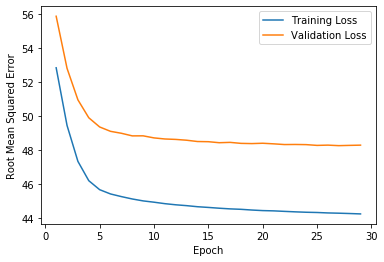

In [187]:
# The following variables are the hyperparameters.
learning_rate = 0.09
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.3

# Shuffle the Data
shuffled_dogs_df = dogs_filtered.reindex(np.random.permutation(dogs_filtered.index))

# Identify the feature and the label.
features = ['Breed', 'Sex', 'Age Group When Rescued', 'Color', 'Size', 'Heartworm Positive']  # the median income on a specific city block.
label = 'Days in Rescue' 

X_2 = shuffled_dogs_df[features]
Y_2 = shuffled_dogs_df[label]

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)


X_2 = pd.get_dummies(data=X_2, drop_first=True)
print(X_2.shape)

epochs, rmse, history = train_model(my_model, X_2, Y_2, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [188]:
my_model.get_weights()

[array([[-4.42266178e+00],
        [ 1.14991703e+01],
        [-6.70754910e+00],
        [-1.40683727e+01],
        [-1.13522949e+01],
        [ 7.64436054e+00],
        [-1.81642380e+01],
        [ 6.82703638e+00],
        [ 7.81786537e+00],
        [ 4.20782566e-01],
        [ 2.69397211e+00],
        [-9.84660339e+00],
        [-1.83757648e+01],
        [-3.47741413e+00],
        [ 9.00636613e-02],
        [ 2.95872068e+00],
        [ 1.31180601e+01],
        [-1.02368057e-01],
        [ 3.66576314e+00],
        [-6.59290123e+00],
        [ 5.32321119e+00],
        [-9.17876661e-02],
        [-2.40768647e+00],
        [-3.41773057e+00],
        [ 1.74906712e+01],
        [ 5.42317343e+00],
        [-9.14427376e+00],
        [-9.88844681e+00],
        [ 8.15066147e+00],
        [-6.29338264e+00],
        [-7.10695553e+00],
        [-2.68471265e+00],
        [-4.47700918e-03],
        [-5.14448881e+00],
        [-4.53094959e+00],
        [-1.01958483e-01],
        [ 3.60640359e+00],
 

In [189]:
results = my_model.evaluate(X_test, Y_test, batch_size=batch_size)

597/597 [==============================] - 0s 9us/sample - loss: 2156.5750 - root_mean_squared_error: 46.4389 - accuracy: 0.0050


In [190]:
results

[2156.5749802070245, 46.43894, 0.0050251256]